# Importing Data & Required Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

np.random.seed(42)
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\lenovo\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\lenovo\Downloads\test.csv")
sample_submission = pd.read_csv(r"C:\Users\lenovo\Downloads\sample_submission.csv")

## Exploratory Data Analysis (EDA)

## Train Data

In [3]:
train.shape

(750000, 18)

In [4]:
train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [5]:
train.tail(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
749990,749990,34,blue-collar,married,secondary,no,1385,no,no,cellular,26,apr,134,2,-1,0,unknown,0
749991,749991,52,management,married,tertiary,no,1359,no,no,cellular,19,aug,124,5,-1,0,unknown,0
749992,749992,56,services,married,secondary,no,2089,yes,no,cellular,20,apr,78,3,305,1,failure,0
749993,749993,41,management,married,secondary,yes,-1300,yes,yes,cellular,17,nov,129,1,-1,0,unknown,0
749994,749994,31,housemaid,single,secondary,no,594,no,no,cellular,4,feb,137,1,-1,0,unknown,0
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0
749999,749999,42,technician,married,secondary,no,1559,no,no,cellular,4,aug,143,1,1,7,failure,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [7]:
train.describe(include= ["int64"])

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [8]:
train.describe(include= ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


In [9]:
for cat_col in train.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{train[cat_col].unique()}\n")

Column job has unique values:
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'primary' 'tertiary' 'unknown']

Column default has unique values:
['no' 'yes']

Column housing has unique values:
['no' 'yes']

Column loan has unique values:
['no' 'yes']

Column contact has unique values:
['cellular' 'unknown' 'telephone']

Column month has unique values:
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']

Column poutcome has unique values:
['unknown' 'other' 'failure' 'success']



In [10]:
for cat_col in train.select_dtypes("object"):
    print(f"Column {cat_col} has value counts proptional values:\n{train[cat_col].value_counts(normalize= True, dropna= False)}\n")

Column job has value counts proptional values:
job
management       0.234055
blue-collar      0.227331
technician       0.184143
admin.           0.108656
services         0.085612
retired          0.046913
self-employed    0.025360
entrepreneur     0.023624
unemployed       0.023512
housemaid        0.021216
student          0.015689
unknown          0.003889
Name: proportion, dtype: float64

Column marital has value counts proptional values:
marital
married     0.641012
single      0.259779
divorced    0.099209
Name: proportion, dtype: float64

Column education has value counts proptional values:
education
secondary    0.535577
tertiary     0.303344
primary      0.132680
unknown      0.028399
Name: proportion, dtype: float64

Column default has value counts proptional values:
default
no     0.982868
yes    0.017132
Name: proportion, dtype: float64

Column housing has value counts proptional values:
housing
yes    0.548384
no     0.451616
Name: proportion, dtype: float64

Column loan 

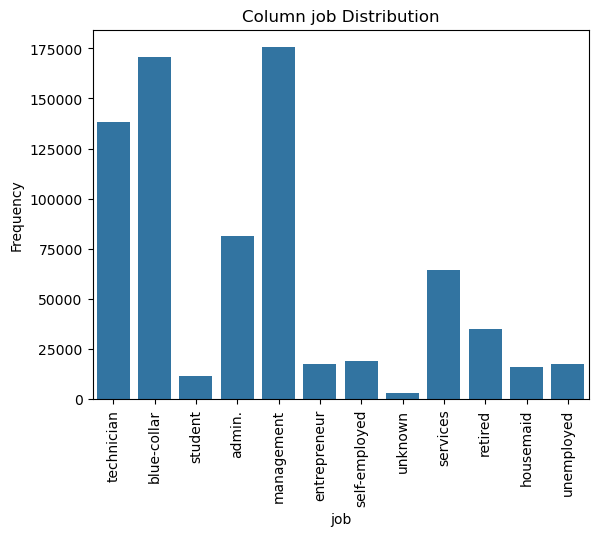

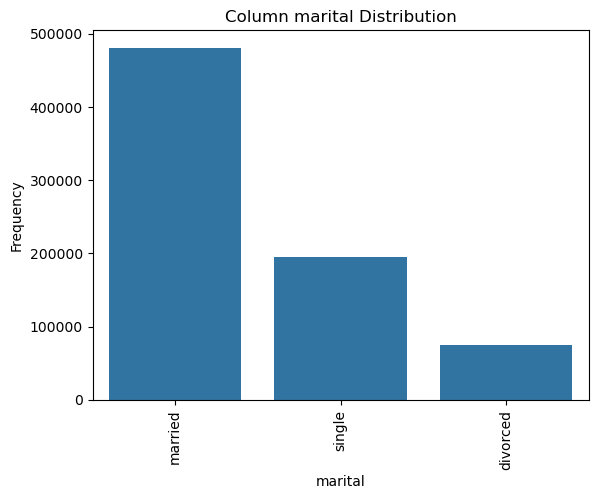

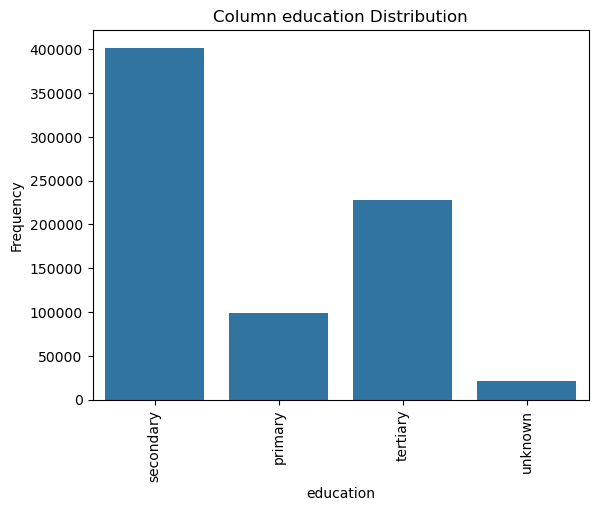

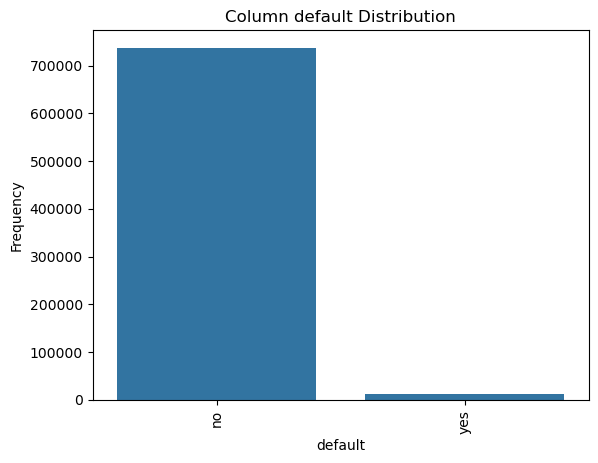

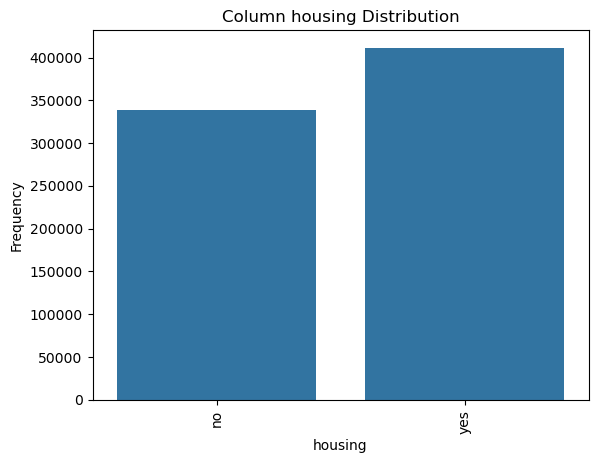

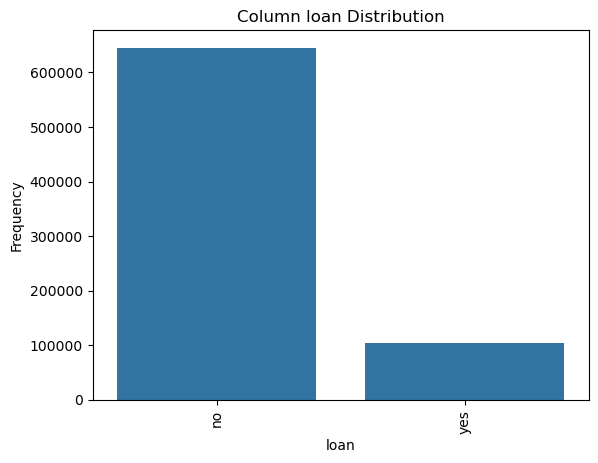

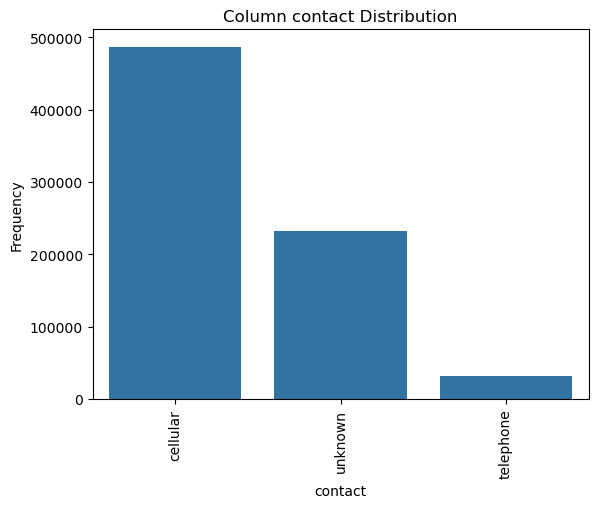

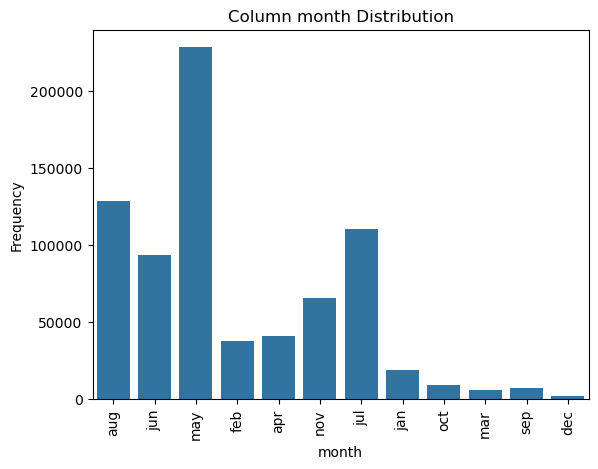

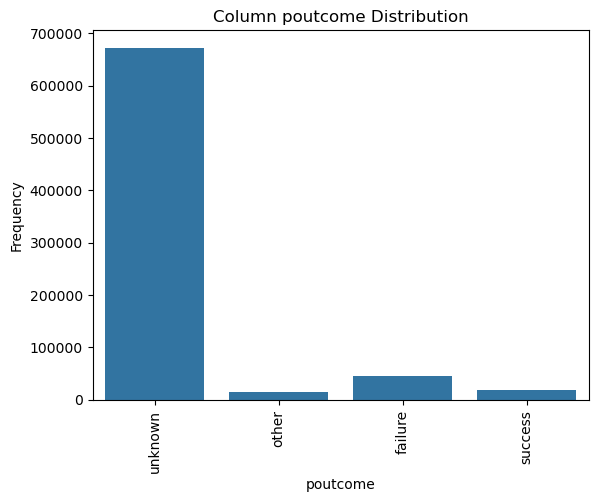

In [11]:
for cat_col in train.select_dtypes("object"):
    sns.countplot(data= train, x= cat_col)
    plt.title(f"Column {cat_col} Distribution")
    plt.xlabel(f"{cat_col}")
    plt.ylabel("Frequency")
    plt.xticks(rotation= 90)
    plt.show();

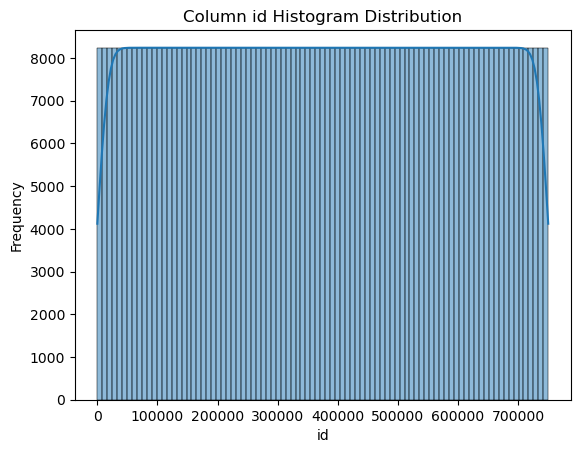

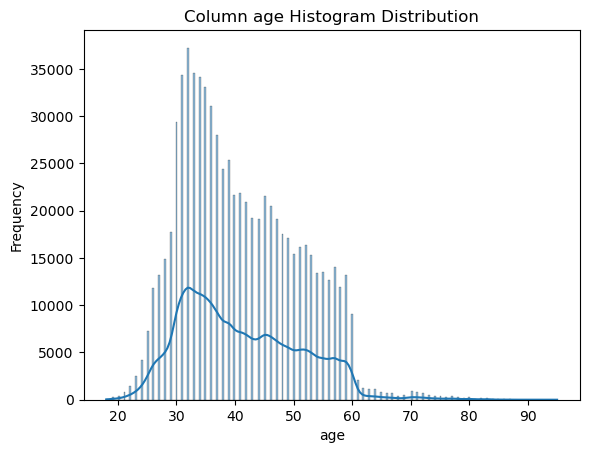

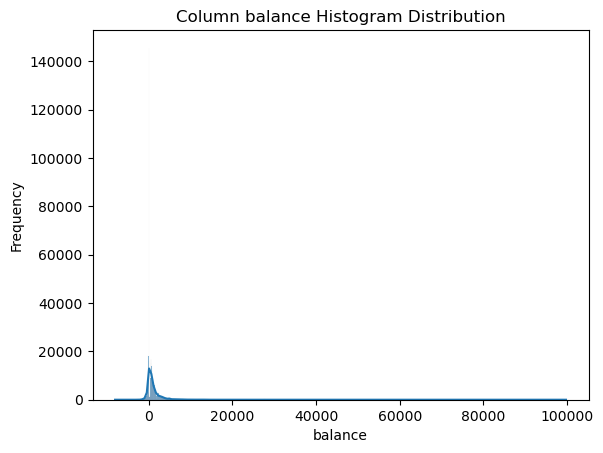

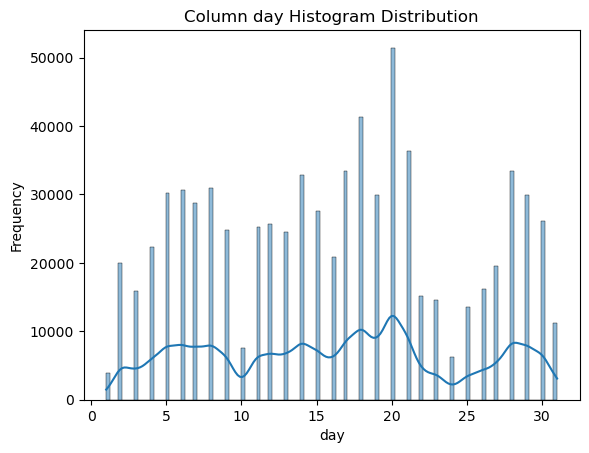

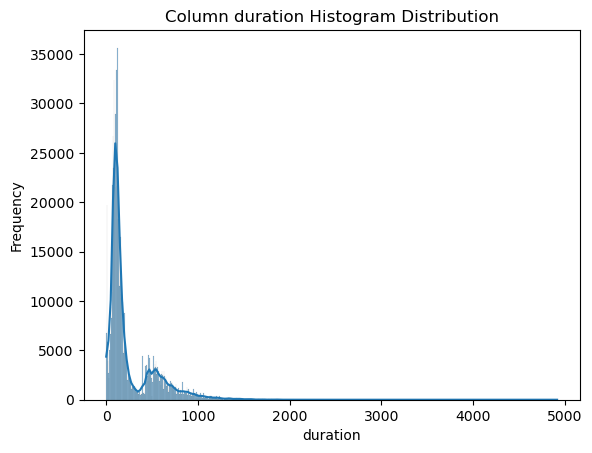

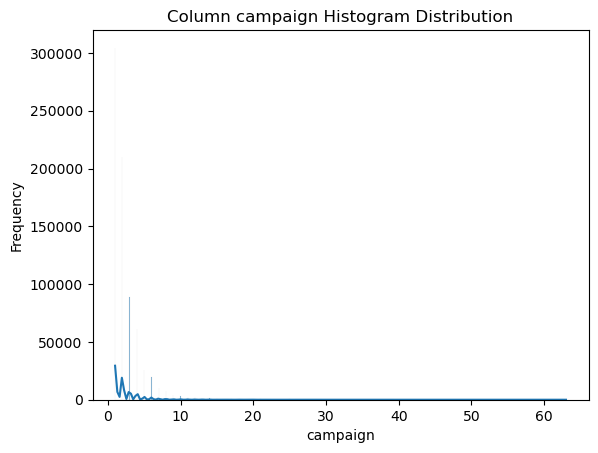

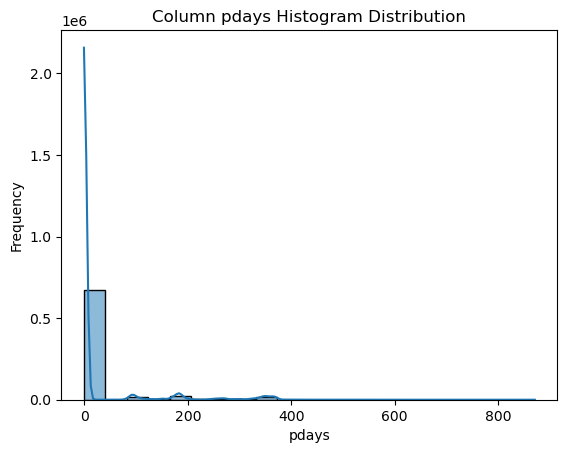

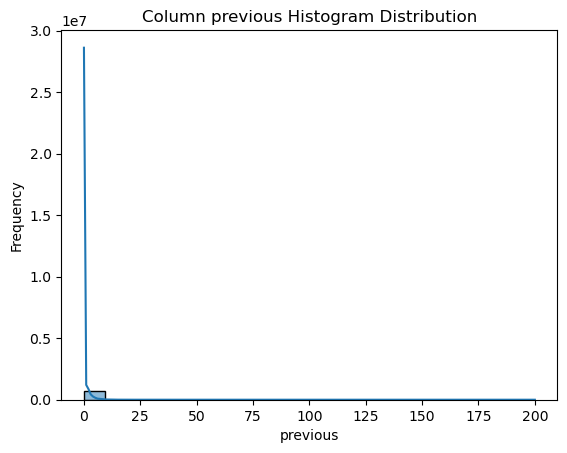

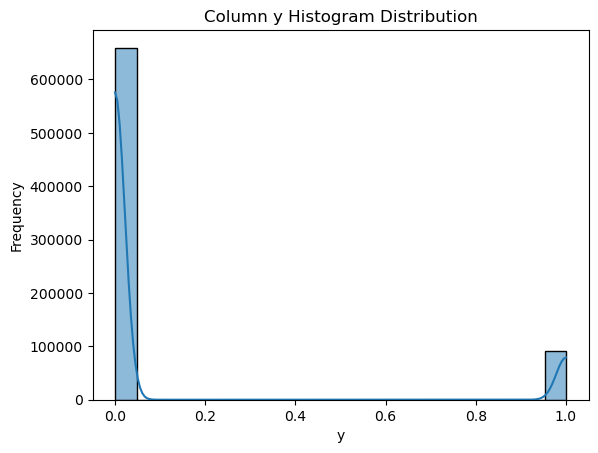

In [12]:
for num_col in train.select_dtypes("int64"):
    sns.histplot(data= train, x= num_col, kde= True)
    plt.title(f"Column {num_col} Histogram Distribution")
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.show();

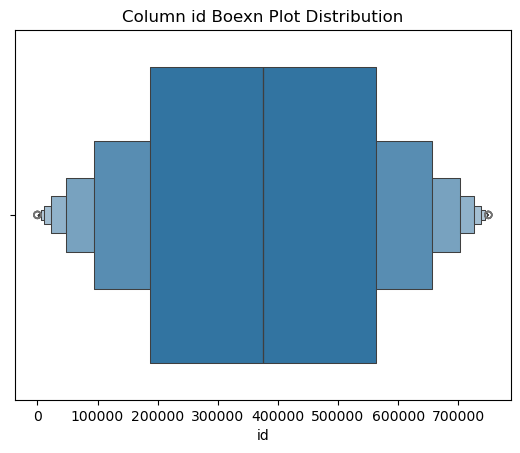

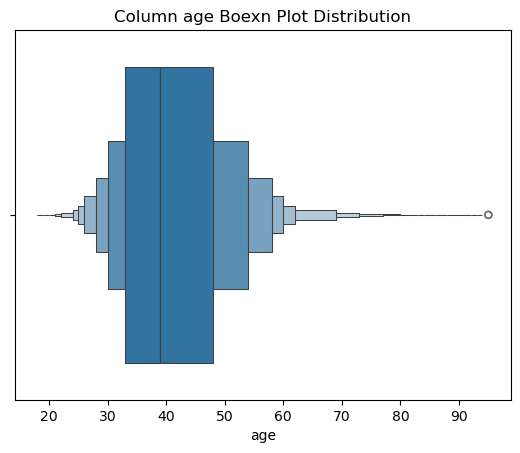

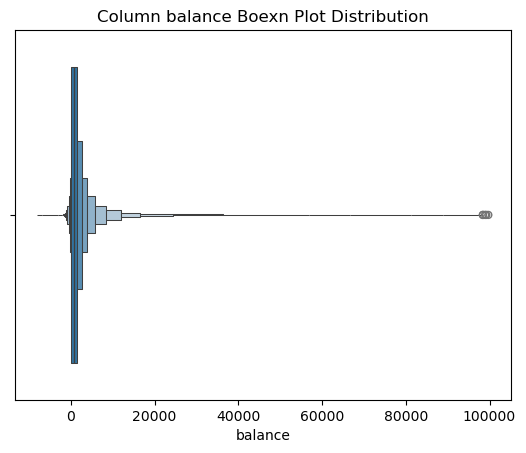

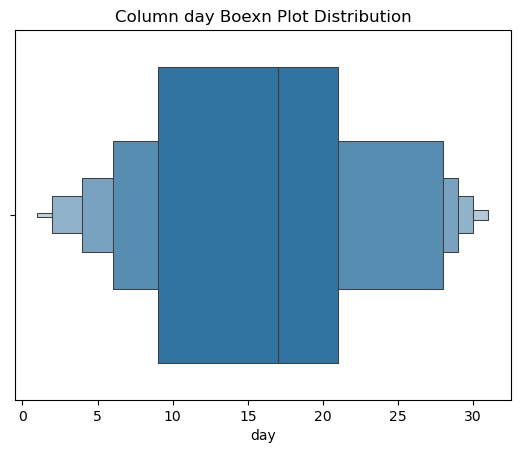

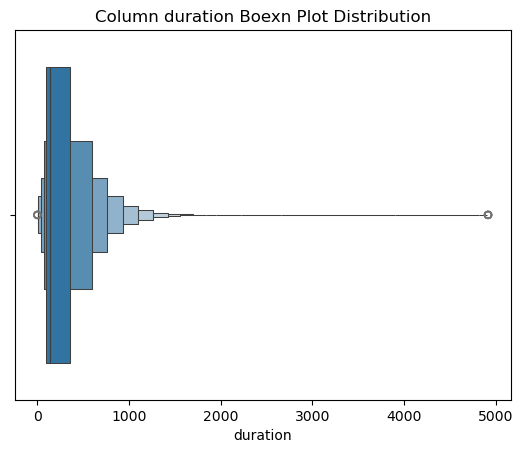

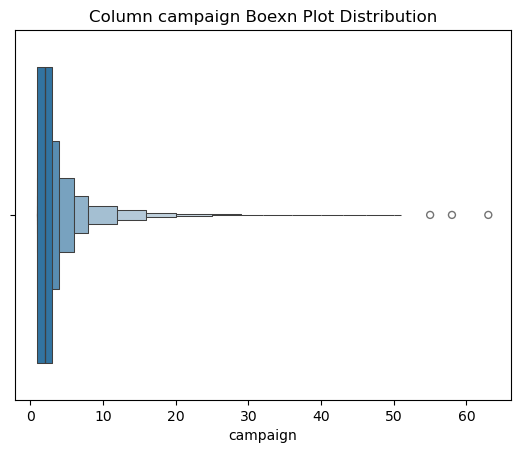

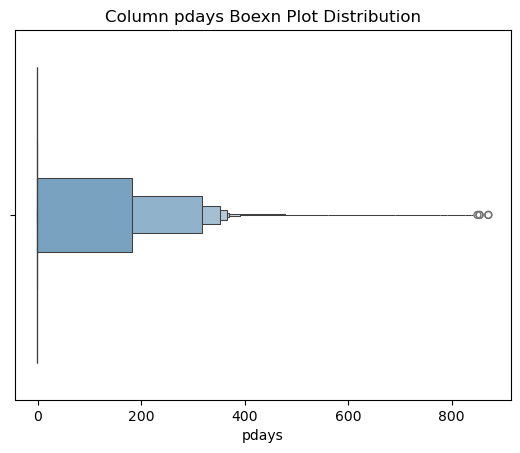

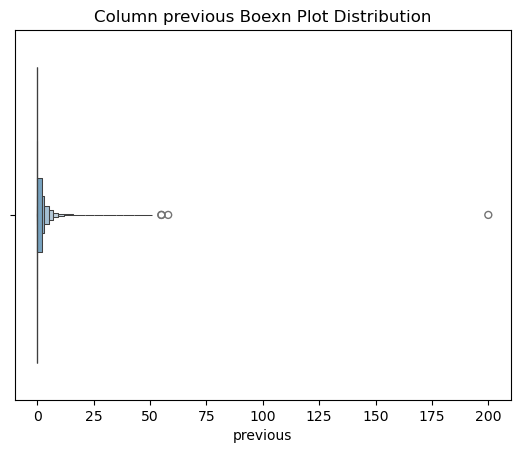

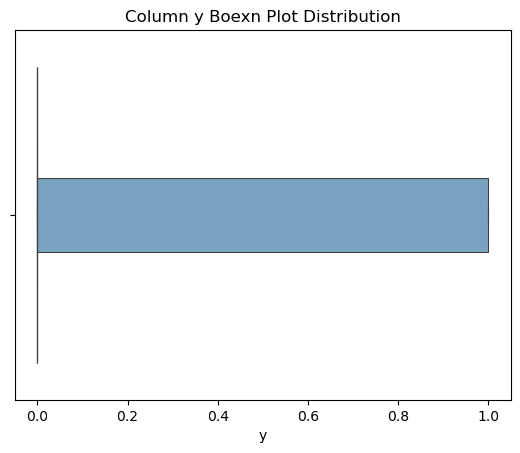

In [13]:
for num_col in train.select_dtypes("int64"):
    sns.boxenplot(data= train, x= num_col)
    plt.title(f"Column {num_col} Boexn Plot Distribution")
    plt.xlabel(f"{num_col}")
    plt.show();

In [14]:
train.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
train.duplicated().sum()

np.int64(0)

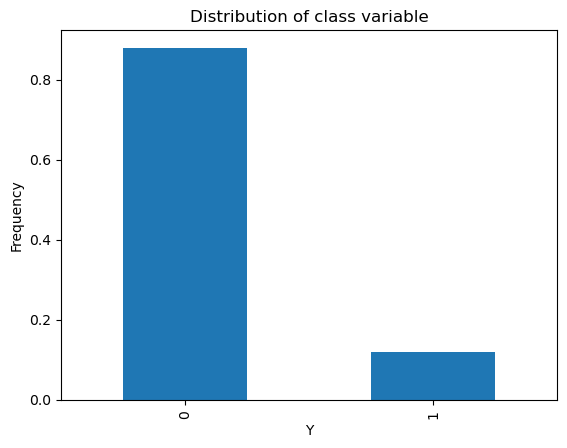

In [16]:
train["y"].value_counts(normalize= True).plot(kind= "bar", title= "Distribution of class variable")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.show();

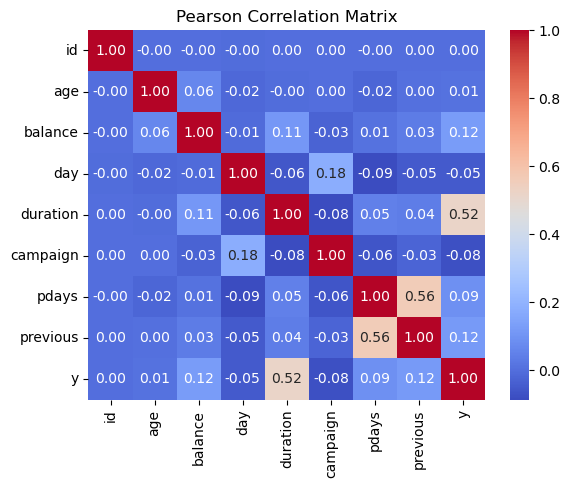

In [17]:
corr = train.select_dtypes("int64").corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Pearson Correlation Matrix")
plt.show();

In [18]:
target_corr = train.select_dtypes("int64").corr()["y"]
target_corr

id          0.000615
age         0.009523
balance     0.122513
day        -0.049625
duration    0.519283
campaign   -0.075829
pdays       0.089277
previous    0.119552
y           1.000000
Name: y, dtype: float64

## Test Data

In [19]:
test.shape

(250000, 17)

In [20]:
test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
5,750005,43,management,divorced,unknown,no,3025,no,no,cellular,21,jul,89,2,-1,0,unknown
6,750006,26,services,single,primary,no,3511,no,no,cellular,29,jan,816,3,-1,0,unknown
7,750007,60,management,married,tertiary,no,79,no,yes,cellular,9,jul,707,1,-1,0,unknown
8,750008,45,blue-collar,married,primary,no,16,no,no,telephone,6,feb,173,1,-1,0,unknown
9,750009,41,management,married,tertiary,no,46,no,no,cellular,18,aug,657,4,-1,0,unknown


In [21]:
test.tail(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
249990,999990,43,blue-collar,married,primary,no,453,no,no,cellular,20,nov,119,2,-1,0,unknown
249991,999991,35,self-employed,single,tertiary,no,726,no,no,unknown,23,may,98,1,-1,0,unknown
249992,999992,43,technician,married,secondary,no,1176,yes,no,unknown,15,may,323,4,-1,0,unknown
249993,999993,40,admin.,married,secondary,no,870,yes,yes,cellular,20,apr,123,1,332,3,failure
249994,999994,35,technician,single,secondary,no,511,yes,no,cellular,7,may,619,1,-1,0,unknown
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown
249999,999999,29,student,single,tertiary,no,722,no,no,cellular,6,apr,119,1,-1,0,unknown


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [23]:
test.describe(include= ["int64"])

,id,age,balance,day,duration,campaign,pdays,previous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,40.932332,1197.426352,16.116068,255.342260,2.573548,22.280028,0.303728
std,72168.927986,10.081613,2741.520699,8.258509,271.404326,2.709661,76.915879,1.384574
min,750000.000000,18.000000,-8019.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,812499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,874999.500000,39.000000,631.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,937499.250000,48.000000,1389.000000,21.000000,353.000000,3.000000,-1.000000,0.000000
max,999999.000000,95.000000,98517.000000,31.000000,4918.000000,58.000000,871.000000,150.000000


In [24]:
test.describe(include= ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,250000,250000,250000,250000,250000,250000,250000,250000,250000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,58636,160412,133724,245843,136534,214957,162462,76009,224115


In [25]:
for cat_col in test.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{train[cat_col].unique()}\n")

Column job has unique values:
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'primary' 'tertiary' 'unknown']

Column default has unique values:
['no' 'yes']

Column housing has unique values:
['no' 'yes']

Column loan has unique values:
['no' 'yes']

Column contact has unique values:
['cellular' 'unknown' 'telephone']

Column month has unique values:
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']

Column poutcome has unique values:
['unknown' 'other' 'failure' 'success']



In [26]:
for cat_col in test.select_dtypes("object"):
    print(f"Column {cat_col} has value counts proptional values:\n{train[cat_col].value_counts(normalize= True, dropna= False)}\n")

Column job has value counts proptional values:
job
management       0.234055
blue-collar      0.227331
technician       0.184143
admin.           0.108656
services         0.085612
retired          0.046913
self-employed    0.025360
entrepreneur     0.023624
unemployed       0.023512
housemaid        0.021216
student          0.015689
unknown          0.003889
Name: proportion, dtype: float64

Column marital has value counts proptional values:
marital
married     0.641012
single      0.259779
divorced    0.099209
Name: proportion, dtype: float64

Column education has value counts proptional values:
education
secondary    0.535577
tertiary     0.303344
primary      0.132680
unknown      0.028399
Name: proportion, dtype: float64

Column default has value counts proptional values:
default
no     0.982868
yes    0.017132
Name: proportion, dtype: float64

Column housing has value counts proptional values:
housing
yes    0.548384
no     0.451616
Name: proportion, dtype: float64

Column loan 

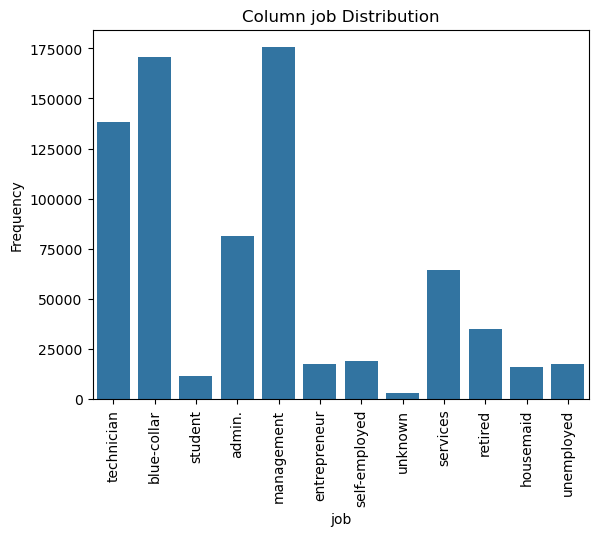

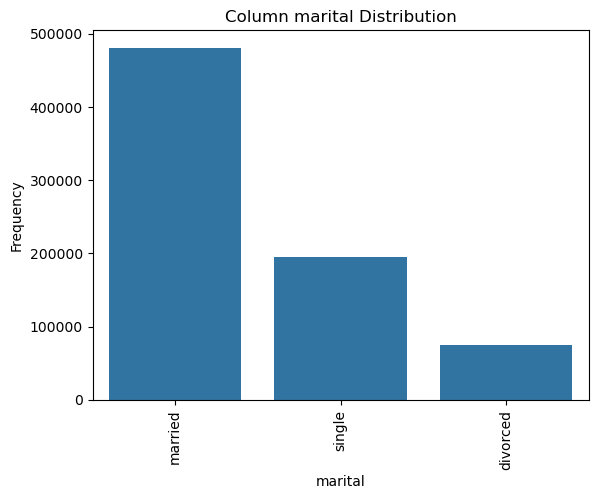

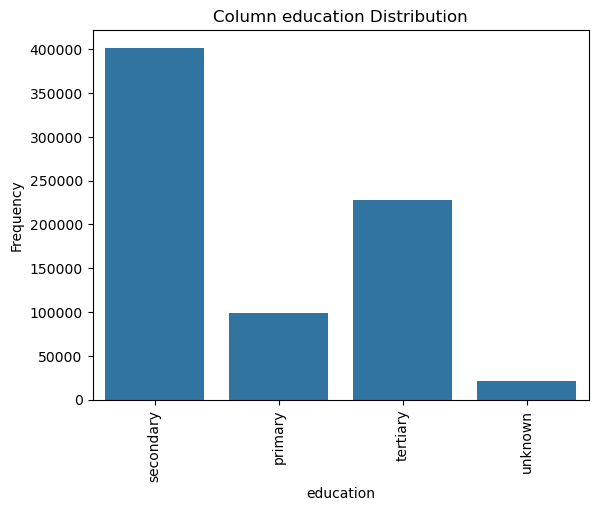

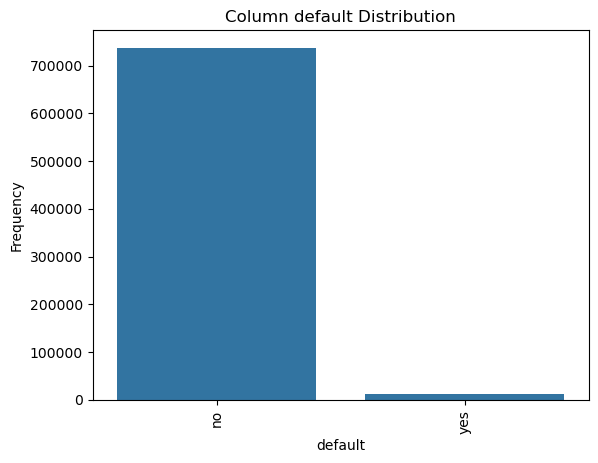

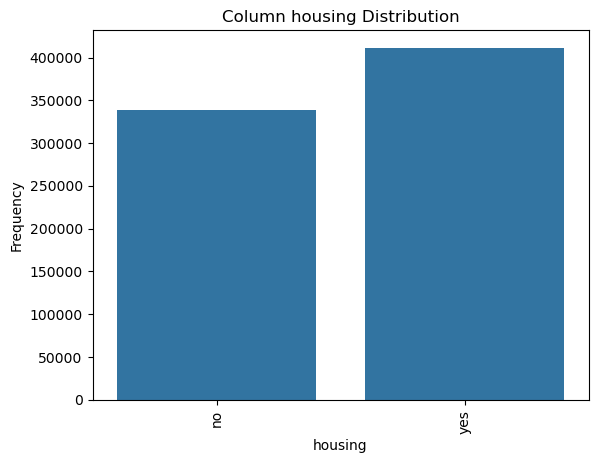

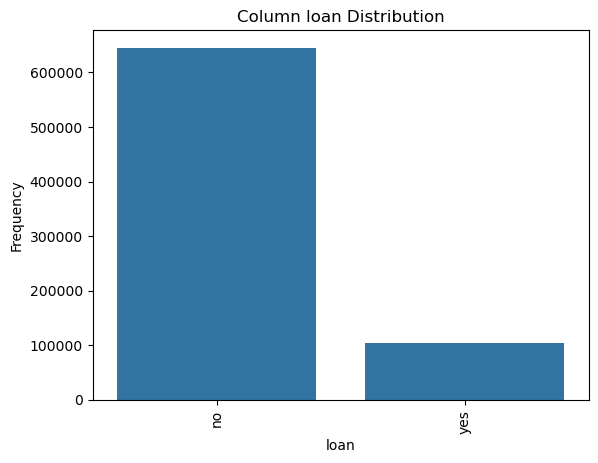

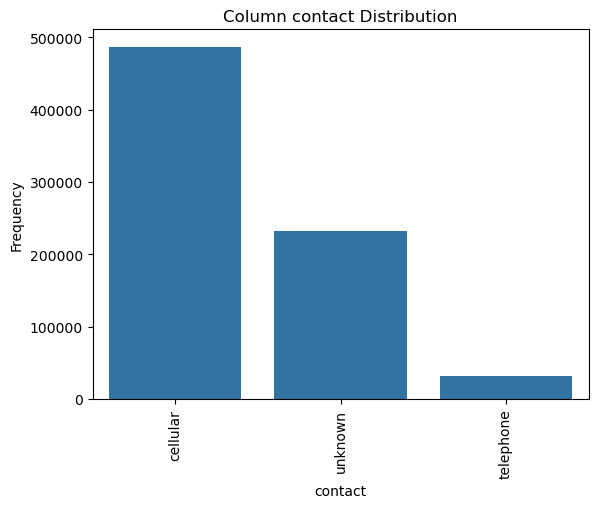

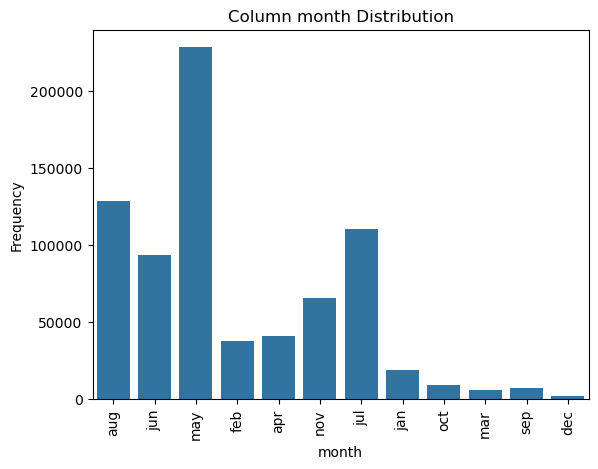

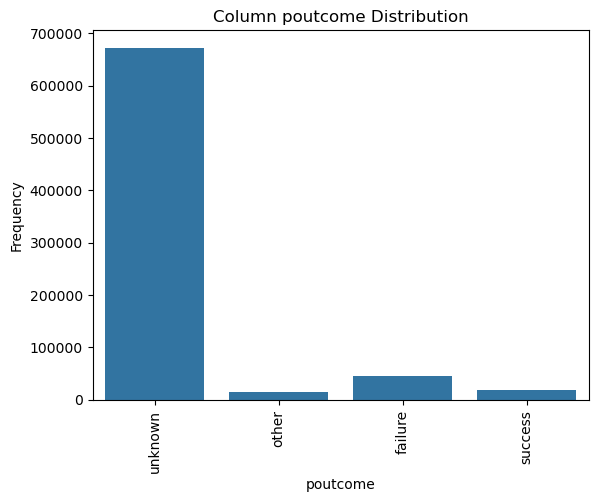

In [27]:
for cat_col in test.select_dtypes("object"):
    sns.countplot(data= train, x= cat_col)
    plt.title(f"Column {cat_col} Distribution")
    plt.xlabel(f"{cat_col}")
    plt.ylabel("Frequency")
    plt.xticks(rotation= 90)
    plt.show();

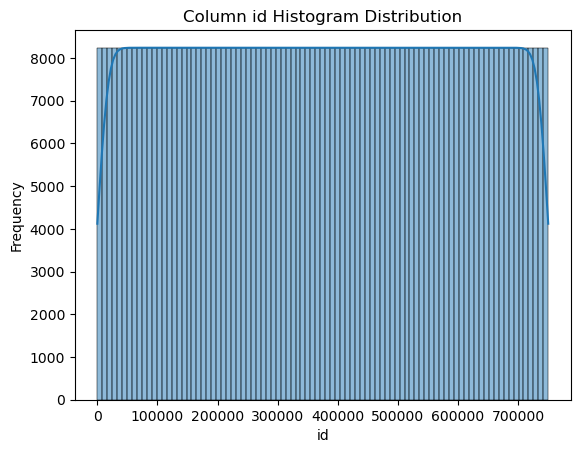

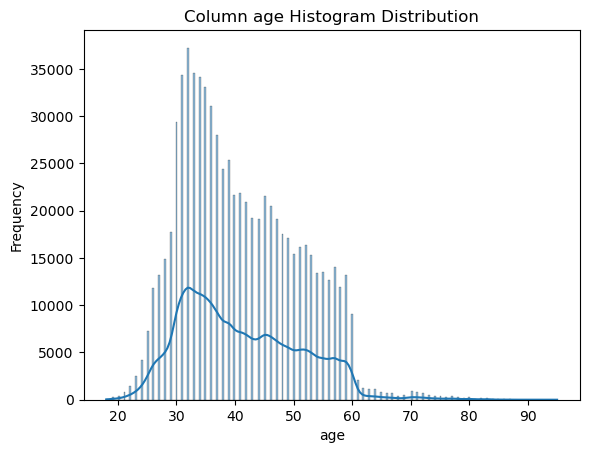

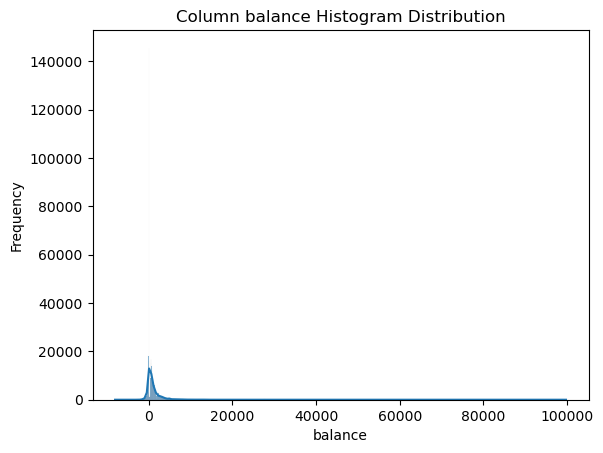

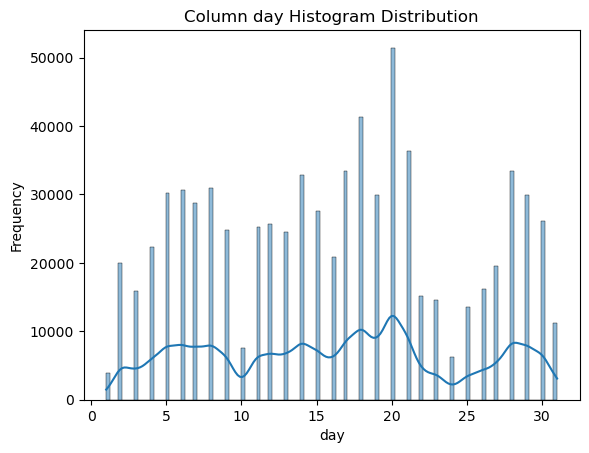

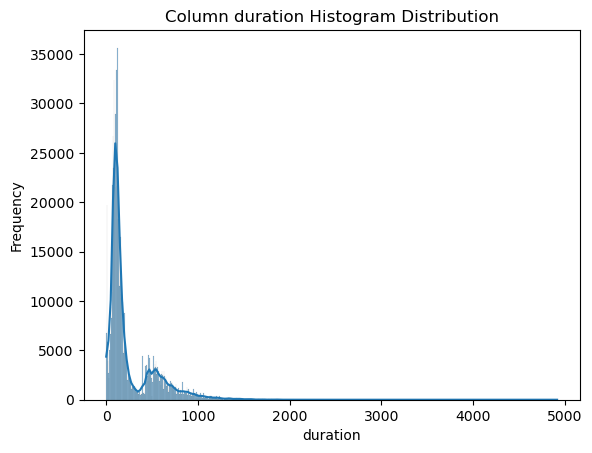

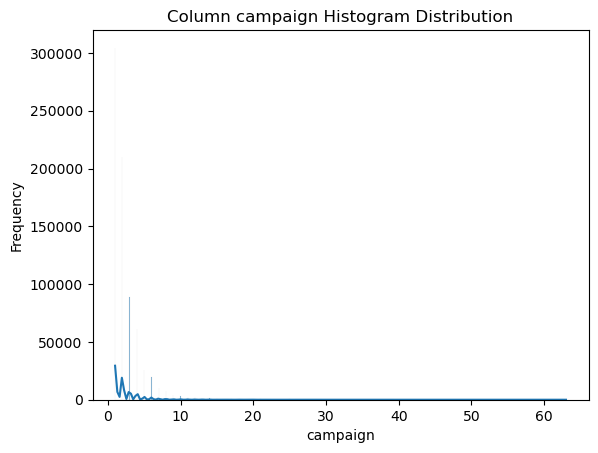

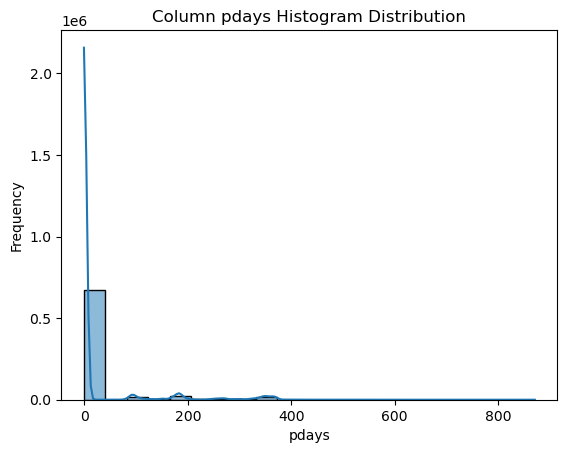

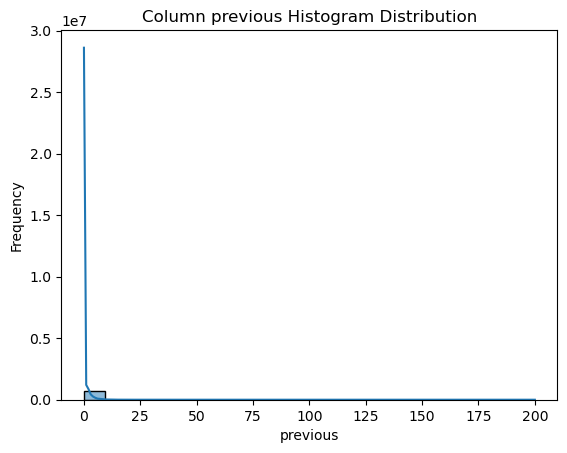

In [28]:
for num_col in test.select_dtypes("int64"):
    sns.histplot(data= train, x= num_col, kde= True)
    plt.title(f"Column {num_col} Histogram Distribution")
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.show();

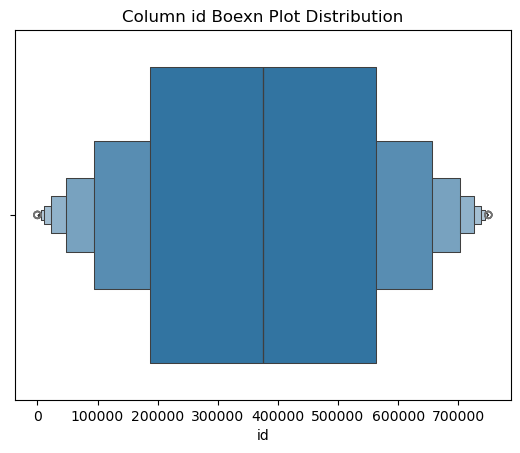

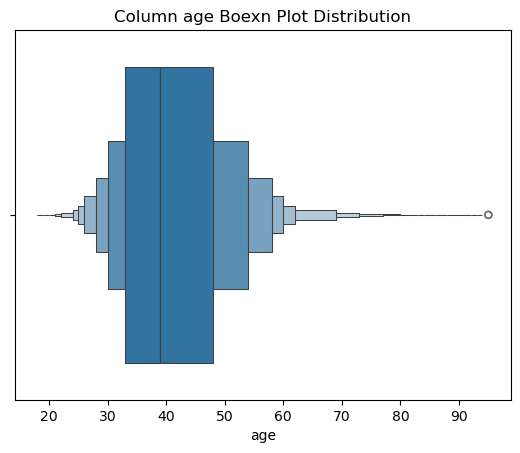

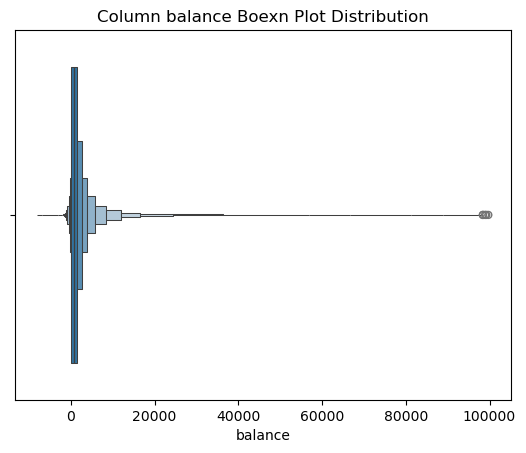

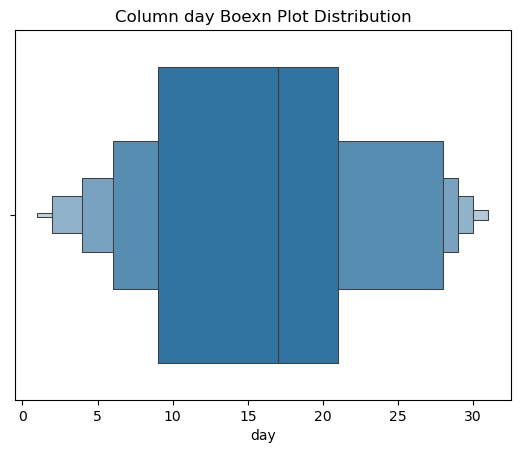

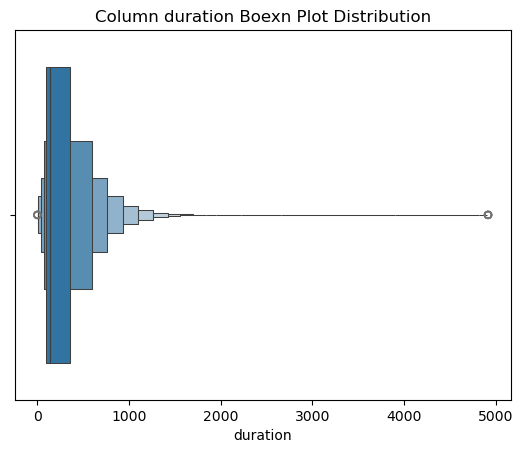

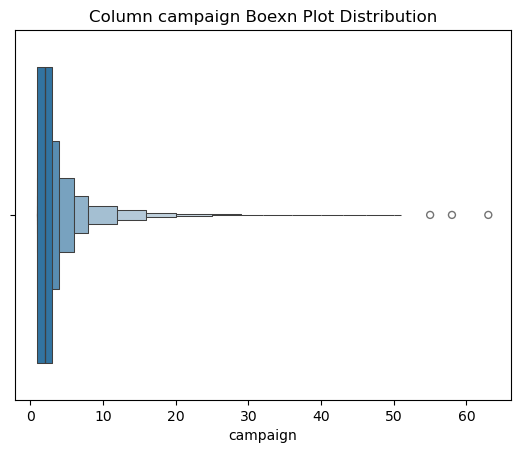

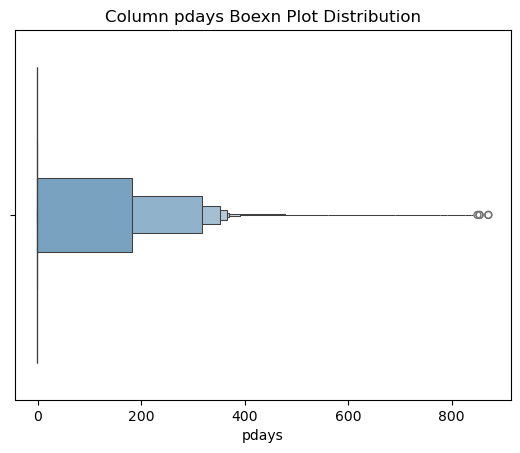

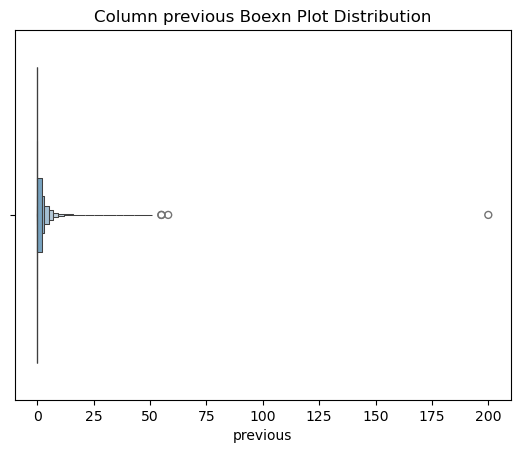

In [29]:
for num_col in test.select_dtypes("int64"):
    sns.boxenplot(data= train, x= num_col)
    plt.title(f"Column {num_col} Boexn Plot Distribution")
    plt.xlabel(f"{num_col}")
    plt.show();

In [30]:
test.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [31]:
test.duplicated().sum()

np.int64(0)

# Data Preprocessing

## Train Data

In [32]:
for cat_col in train.select_dtypes("object"):
    train[cat_col] = train[cat_col].replace("unknown", pd.NA)

In [33]:
for cat_col in train.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{train[cat_col].unique()}\n")

Column job has unique values:
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' <NA> 'services' 'retired' 'housemaid' 'unemployed']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'primary' 'tertiary' <NA>]

Column default has unique values:
['no' 'yes']

Column housing has unique values:
['no' 'yes']

Column loan has unique values:
['no' 'yes']

Column contact has unique values:
['cellular' <NA> 'telephone']

Column month has unique values:
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']

Column poutcome has unique values:
[<NA> 'other' 'failure' 'success']



In [34]:
train.isna().sum()

id                0
age               0
job            2917
marital           0
education     21299
default           0
balance           0
housing           0
loan              0
contact      231627
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome     672450
y                 0
dtype: int64

In [35]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

train["month"] = train["month"].map(month_mapping).astype("int64")
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,8,117,3,-1,0,<NA>,0
1,1,38,blue-collar,married,secondary,no,514,no,no,<NA>,18,6,185,1,-1,0,<NA>,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,<NA>,14,5,111,2,-1,0,<NA>,0
3,3,27,student,single,secondary,no,34,yes,no,<NA>,28,5,10,2,-1,0,<NA>,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,2,902,1,-1,0,<NA>,1


In [36]:
for cat_col in train.select_dtypes("object"):
    if (train[cat_col].nunique() == 2) and (cat_col != "contact") :
        train[cat_col] = train[cat_col].map({'no': 0, 'yes': 1})

train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,0,7,0,0,cellular,25,8,117,3,-1,0,<NA>,0
1,1,38,blue-collar,married,secondary,0,514,0,0,<NA>,18,6,185,1,-1,0,<NA>,0
2,2,36,blue-collar,married,secondary,0,602,1,0,<NA>,14,5,111,2,-1,0,<NA>,0
3,3,27,student,single,secondary,0,34,1,0,<NA>,28,5,10,2,-1,0,<NA>,0
4,4,26,technician,married,secondary,0,889,1,0,cellular,3,2,902,1,-1,0,<NA>,1


In [37]:
for cat_col in train.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{train[cat_col].unique()}\n")

Column job has unique values:
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' <NA> 'services' 'retired' 'housemaid' 'unemployed']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'primary' 'tertiary' <NA>]

Column contact has unique values:
['cellular' <NA> 'telephone']

Column poutcome has unique values:
[<NA> 'other' 'failure' 'success']



In [38]:
thresh = 0.50

cols_to_drop = []

for col in train.columns:
    if train[col].isna().sum() / train.shape[0] >= thresh:
        cols_to_drop.append(col)

print(cols_to_drop)

['poutcome']


In [39]:
train = train.drop(columns= ["id"] + cols_to_drop, axis= 1)
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,42,technician,married,secondary,0,7,0,0,cellular,25,8,117,3,-1,0,0
1,38,blue-collar,married,secondary,0,514,0,0,<NA>,18,6,185,1,-1,0,0
2,36,blue-collar,married,secondary,0,602,1,0,<NA>,14,5,111,2,-1,0,0
3,27,student,single,secondary,0,34,1,0,<NA>,28,5,10,2,-1,0,0
4,26,technician,married,secondary,0,889,1,0,cellular,3,2,902,1,-1,0,1


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        747083 non-null  object
 2   marital    750000 non-null  object
 3   education  728701 non-null  object
 4   default    750000 non-null  int64 
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  int64 
 7   loan       750000 non-null  int64 
 8   contact    518373 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  int64 
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  y          750000 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 91.6+ MB


In [41]:
for col in train.columns:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

In [42]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  int64 
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  int64 
 7   loan       750000 non-null  int64 
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  int64 
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  y          750000 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 91.6+ MB


In [44]:
for cat_col in train.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{train[cat_col].unique()}\n")

Column job has unique values:
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'services' 'retired' 'housemaid' 'unemployed']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'primary' 'tertiary']

Column contact has unique values:
['cellular' 'telephone']



In [45]:
train["contact"] = train["contact"].map({"cellular": 0, "telephone": 1})
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,42,technician,married,secondary,0,7,0,0,0,25,8,117,3,-1,0,0
1,38,blue-collar,married,secondary,0,514,0,0,0,18,6,185,1,-1,0,0
2,36,blue-collar,married,secondary,0,602,1,0,0,14,5,111,2,-1,0,0
3,27,student,single,secondary,0,34,1,0,0,28,5,10,2,-1,0,0
4,26,technician,married,secondary,0,889,1,0,0,3,2,902,1,-1,0,1


In [46]:
train["log_age"] = np.log1p(train["age"])
train["log_duration"] = np.log1p(train["duration"])
train["log_campaign"] = np.log1p(train["campaign"])
train["log_previous"] = np.log1p(train["previous"])

In [47]:
balance = train["balance"].values.reshape(-1, 1)
pt = PowerTransformer(method= "yeo-johnson")
balance_transformed = pt.fit_transform(balance)
train["balance_transformed"] = balance_transformed

In [48]:
pdays = train["pdays"].values.reshape(-1, 1)
pt = PowerTransformer(method= "yeo-johnson")
pdays_transformed = pt.fit_transform(pdays)
train["pdays_transformed"] = pdays_transformed

In [49]:
train = train.drop(columns= ["age", "duration", "campaign", "balance", "previous", "pdays"], axis= 1)
train.head()

,job,marital,education,default,housing,loan,contact,day,month,y,log_age,log_duration,log_campaign,log_previous,balance_transformed,pdays_transformed
0,technician,married,secondary,0,0,0,0,25,8,0,3.761200,4.770685,1.386294,0.0,-0.372365,-0.339627
1,blue-collar,married,secondary,0,0,0,0,18,6,0,3.663562,5.225747,0.693147,0.0,-0.130130,-0.339627
2,blue-collar,married,secondary,0,1,0,0,14,5,0,3.610918,4.718499,1.098612,0.0,-0.093796,-0.339627
3,student,single,secondary,0,1,0,0,28,5,0,3.332205,2.397895,1.098612,0.0,-0.354751,-0.339627
4,technician,married,secondary,0,1,0,0,3,2,1,3.295837,6.805723,0.693147,0.0,0.020198,-0.339627


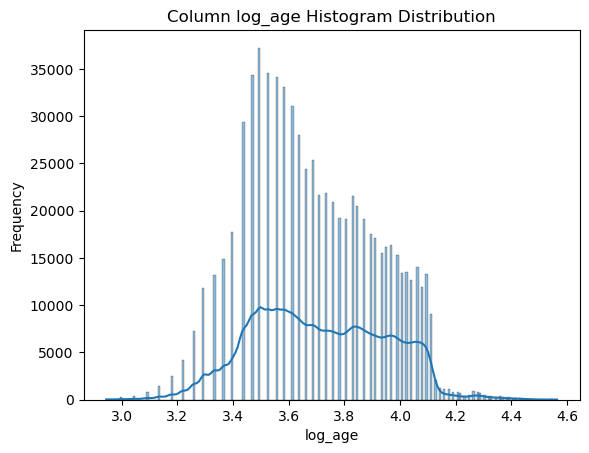

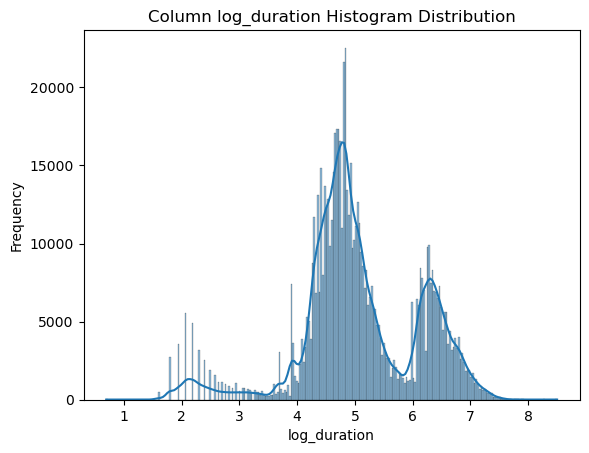

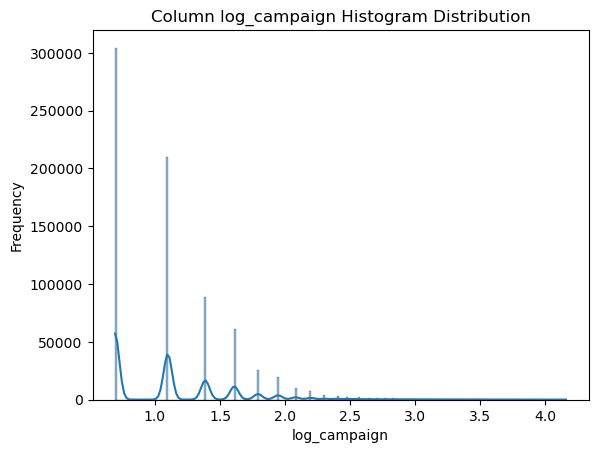

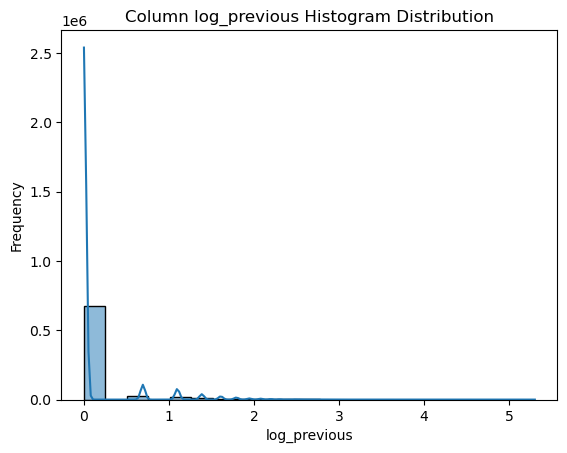

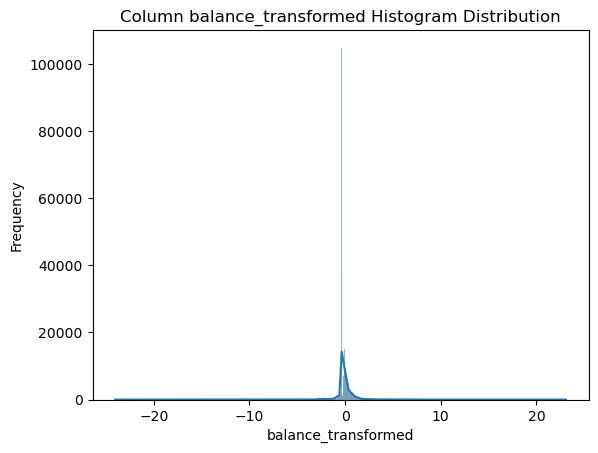

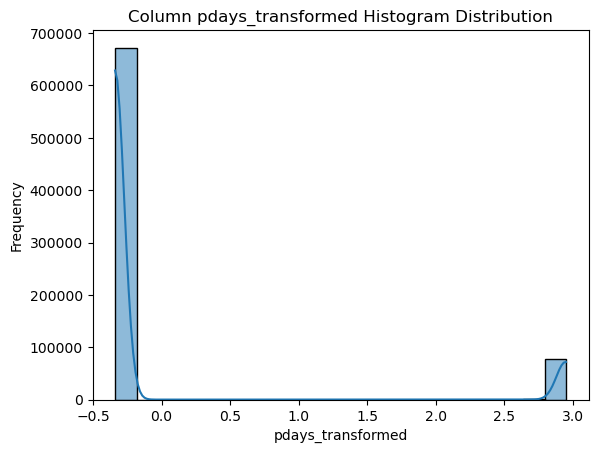

In [50]:
for num_col in train.select_dtypes("float64"):
    sns.histplot(data= train, x= num_col, kde= True)
    plt.title(f"Column {num_col} Histogram Distribution")
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.show();

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   job                  750000 non-null  object 
 1   marital              750000 non-null  object 
 2   education            750000 non-null  object 
 3   default              750000 non-null  int64  
 4   housing              750000 non-null  int64  
 5   loan                 750000 non-null  int64  
 6   contact              750000 non-null  int64  
 7   day                  750000 non-null  int64  
 8   month                750000 non-null  int64  
 9   y                    750000 non-null  int64  
 10  log_age              750000 non-null  float64
 11  log_duration         750000 non-null  float64
 12  log_campaign         750000 non-null  float64
 13  log_previous         750000 non-null  float64
 14  balance_transformed  750000 non-null  float64
 15  pdays_transformed

In [52]:
corr = train.select_dtypes(include= ["int64", "float64"]).corr()
corr

,default,housing,loan,contact,day,month,y,log_age,log_duration,log_campaign,log_previous,balance_transformed,pdays_transformed
default,1.000000,0.010113,0.089927,-0.012682,0.013138,0.007870,-0.030134,-0.012474,-0.030203,0.025853,-0.020800,-0.164494,-0.023470
housing,0.010113,1.000000,0.064034,-0.061008,-0.015233,-0.197381,-0.153589,-0.160830,-0.005269,-0.052116,0.050742,-0.100687,0.063551
loan,0.089927,0.064034,1.000000,-0.003161,0.020151,0.017502,-0.081639,-0.012308,-0.025882,0.008361,-0.020416,-0.157988,-0.022933
contact,-0.012682,-0.061008,-0.003161,1.000000,0.026983,0.025299,0.010418,0.125396,-0.054224,0.063840,0.035986,0.045897,0.029072
day,0.013138,-0.015233,0.020151,0.026983,1.000000,0.106131,-0.049625,-0.012804,-0.084109,0.190598,-0.072279,-0.024610,-0.079779
month,0.007870,-0.197381,0.017502,0.025299,0.106131,1.000000,-0.001362,0.104090,-0.040369,0.078408,-0.044146,0.075626,-0.052903
y,-0.030134,-0.153589,-0.081639,0.010418,-0.049625,-0.001362,1.000000,-0.012653,0.435684,-0.091942,0.163137,0.144187,0.169435
log_age,-0.012474,-0.160830,-0.012308,0.125396,-0.012804,0.104090,-0.012653,1.000000,-0.013102,0.022039,-0.001955,0.049146,-0.007946
log_duration,-0.030203,-0.005269,-0.025882,-0.054224,-0.084109,-0.040369,0.435684,-0.013102,1.000000,-0.202083,0.057727,0.111623,0.068469
log_campaign,0.025853,-0.052116,0.008361,0.063840,0.190598,0.078408,-0.091942,0.022039,-0.202083,1.000000,-0.061128,-0.040107,-0.089420


## Test Data

In [53]:
for cat_col in test.select_dtypes("object"):
    test[cat_col] = test[cat_col].replace("unknown", pd.NA)

In [54]:
for cat_col in test.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{test[cat_col].unique()}\n")

Column job has unique values:
['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student' <NA>]

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'tertiary' 'primary' <NA>]

Column default has unique values:
['no' 'yes']

Column housing has unique values:
['yes' 'no']

Column loan has unique values:
['no' 'yes']

Column contact has unique values:
[<NA> 'cellular' 'telephone']

Column month has unique values:
['may' 'apr' 'jul' 'jan' 'feb' 'aug' 'nov' 'jun' 'sep' 'oct' 'mar' 'dec']

Column poutcome has unique values:
[<NA> 'other' 'failure' 'success']



In [55]:
test.isna().sum()

id                0
age               0
job            1022
marital           0
education      7250
default           0
balance           0
housing           0
loan              0
contact       76896
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome     224115
dtype: int64

In [56]:
test["month"] = test["month"].map(month_mapping).astype("int64")
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,<NA>,21,5,224,1,-1,0,<NA>
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,4,586,2,-1,0,<NA>
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,5,111,2,-1,0,<NA>
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,<NA>,29,5,125,1,-1,0,<NA>
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,7,181,1,-1,0,<NA>


In [57]:
for cat_col in test.select_dtypes("object"):
    if (test[cat_col].nunique() == 2) and (cat_col != "contact") :
        test[cat_col] = test[cat_col].map({'no': 0, 'yes': 1})

test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,0,1397,1,0,<NA>,21,5,224,1,-1,0,<NA>
1,750001,44,management,married,tertiary,0,23,1,0,cellular,3,4,586,2,-1,0,<NA>
2,750002,36,self-employed,married,primary,0,46,1,1,cellular,13,5,111,2,-1,0,<NA>
3,750003,58,blue-collar,married,secondary,0,-1380,1,1,<NA>,29,5,125,1,-1,0,<NA>
4,750004,28,technician,single,secondary,0,1950,1,0,cellular,22,7,181,1,-1,0,<NA>


In [58]:
for cat_col in test.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{test[cat_col].unique()}\n")

Column job has unique values:
['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student' <NA>]

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'tertiary' 'primary' <NA>]

Column contact has unique values:
[<NA> 'cellular' 'telephone']

Column poutcome has unique values:
[<NA> 'other' 'failure' 'success']



In [59]:
thresh = 0.50

cols_to_drop = []

for col in test.columns:
    if test[col].isna().sum() / test.shape[0] >= thresh:
        cols_to_drop.append(col)

print(cols_to_drop)

['poutcome']


In [60]:
test = test.drop(columns= ["id"] + cols_to_drop, axis= 1)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,blue-collar,married,secondary,0,1397,1,0,<NA>,21,5,224,1,-1,0
1,44,management,married,tertiary,0,23,1,0,cellular,3,4,586,2,-1,0
2,36,self-employed,married,primary,0,46,1,1,cellular,13,5,111,2,-1,0
3,58,blue-collar,married,secondary,0,-1380,1,1,<NA>,29,5,125,1,-1,0
4,28,technician,single,secondary,0,1950,1,0,cellular,22,7,181,1,-1,0


In [61]:
for col in test.columns:
    if test[col].dtype == "object":
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].median())

In [62]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

In [63]:
for cat_col in test.select_dtypes("object"):
    print(f"Column {cat_col} has unique values:\n{test[cat_col].unique()}\n")

Column job has unique values:
['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student']

Column marital has unique values:
['married' 'single' 'divorced']

Column education has unique values:
['secondary' 'tertiary' 'primary']

Column contact has unique values:
['cellular' 'telephone']



In [64]:
test["contact"] = test["contact"].map({"cellular": 0, "telephone": 1})
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,blue-collar,married,secondary,0,1397,1,0,0,21,5,224,1,-1,0
1,44,management,married,tertiary,0,23,1,0,0,3,4,586,2,-1,0
2,36,self-employed,married,primary,0,46,1,1,0,13,5,111,2,-1,0
3,58,blue-collar,married,secondary,0,-1380,1,1,0,29,5,125,1,-1,0
4,28,technician,single,secondary,0,1950,1,0,0,22,7,181,1,-1,0


In [65]:
test["log_age"] = np.log1p(test["age"])
test["log_duration"] = np.log1p(test["duration"])
test["log_campaign"] = np.log1p(test["campaign"])
test["log_previous"] = np.log1p(test["previous"]) 

In [66]:
balance = test["balance"].values.reshape(-1, 1)
pt = PowerTransformer(method= "yeo-johnson")
balance_transformed = pt.fit_transform(balance)
test["balance_transformed"] = balance_transformed

In [67]:
pdays = test["pdays"].values.reshape(-1, 1)
pt = PowerTransformer(method= "yeo-johnson")
pdays_transformed = pt.fit_transform(pdays)
test["pdays_transformed"] = pdays_transformed

In [68]:
test = test.drop(columns= ["age", "duration", "campaign", "balance", "previous", "pdays"], axis= 1)
test.head()

,job,marital,education,default,housing,loan,contact,day,month,log_age,log_duration,log_campaign,log_previous,balance_transformed,pdays_transformed
0,blue-collar,married,secondary,0,1,0,0,21,5,3.496508,5.416100,0.693147,0.0,0.216126,-0.339864
1,management,married,tertiary,0,1,0,0,3,4,3.806662,6.375025,1.098612,0.0,-0.370740,-0.339864
2,self-employed,married,primary,0,1,1,0,13,5,3.610918,4.718499,1.098612,0.0,-0.356480,-0.339864
3,blue-collar,married,secondary,0,1,1,0,29,5,4.077537,4.836282,0.693147,0.0,-3.693888,-0.339864
4,technician,single,secondary,0,1,0,0,22,7,3.367296,5.204007,0.693147,0.0,0.417681,-0.339864


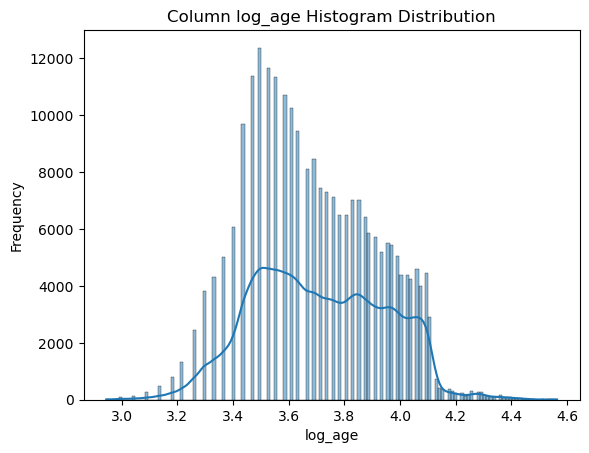

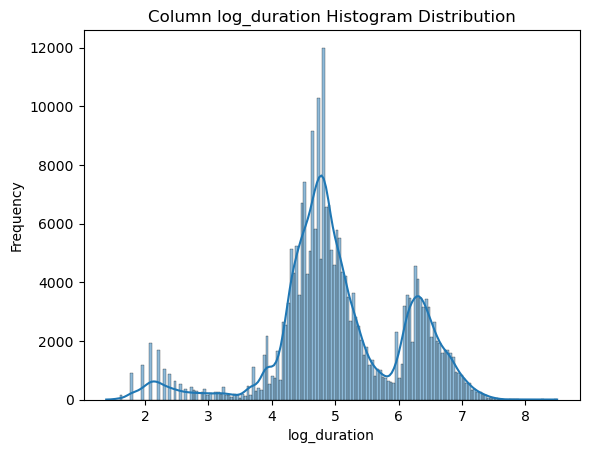

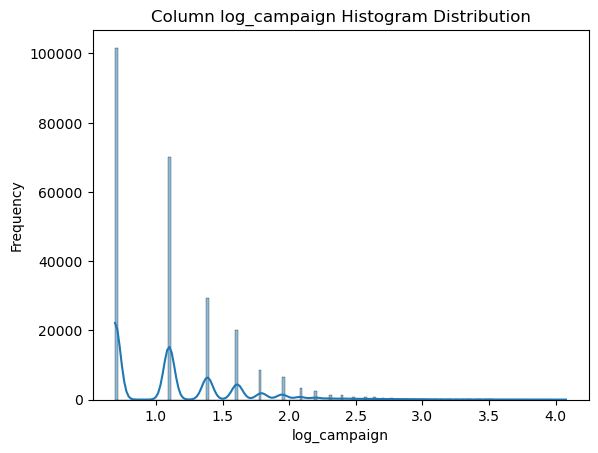

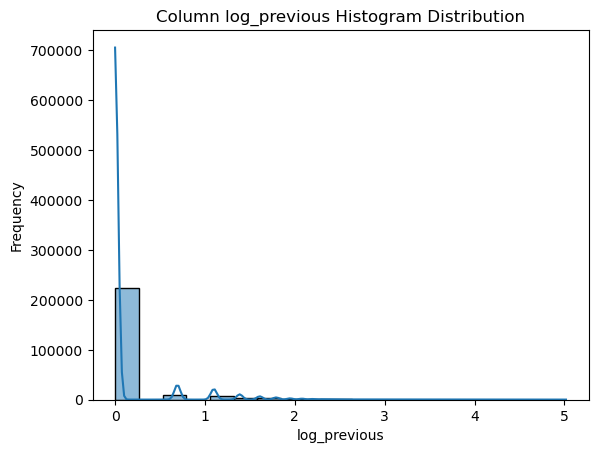

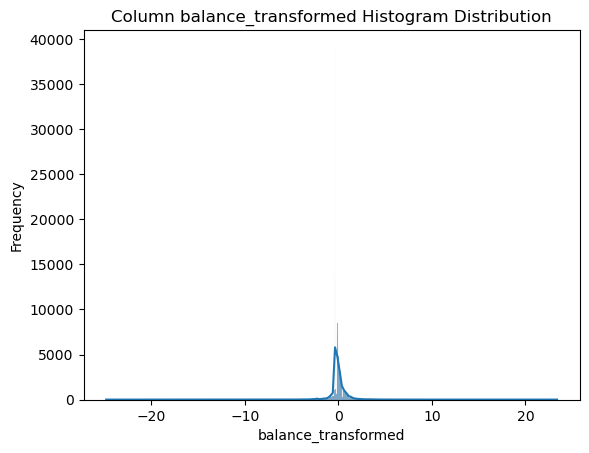

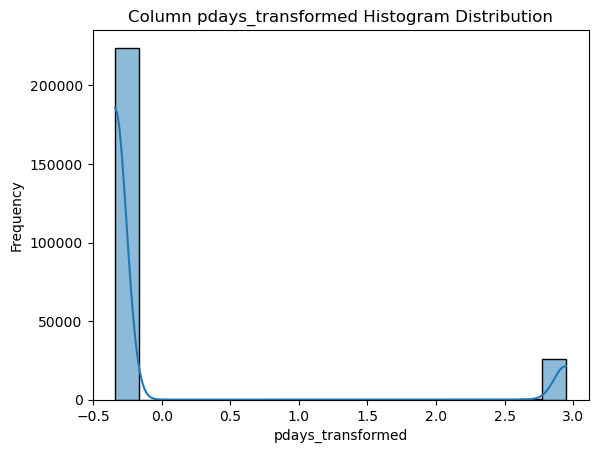

In [69]:
for num_col in test.select_dtypes("float64"):
    if test[num_col].nunique() != 2:
        sns.histplot(data= test, x= num_col, kde= True)
        plt.title(f"Column {num_col} Histogram Distribution")
        plt.xlabel(f"{num_col}")
        plt.ylabel("Frequency")
        plt.show();

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   job                  250000 non-null  object 
 1   marital              250000 non-null  object 
 2   education            250000 non-null  object 
 3   default              250000 non-null  int64  
 4   housing              250000 non-null  int64  
 5   loan                 250000 non-null  int64  
 6   contact              250000 non-null  int64  
 7   day                  250000 non-null  int64  
 8   month                250000 non-null  int64  
 9   log_age              250000 non-null  float64
 10  log_duration         250000 non-null  float64
 11  log_campaign         250000 non-null  float64
 12  log_previous         250000 non-null  float64
 13  balance_transformed  250000 non-null  float64
 14  pdays_transformed    250000 non-null  float64
dtypes: float64(6), in

# Feature Selection, Model Building, and Model Evaluation

In [71]:
binary_features = train.select_dtypes(include= ["int64"]).columns.tolist()
transformed_features = train.select_dtypes(include= ["float64"]).columns.tolist()
binary_features = [col for col in binary_features if col != "y"]
cat_features_nominal = ["job", "marital"]
cat_features_ordinal = ["education"]
ordered_cat = ["primary", "secondary", "tertiary"]

In [72]:
preprocessor = ColumnTransformer(
    [
        ("robust scaler", RobustScaler(), transformed_features),
        ("passthrough", "passthrough", binary_features),
        ("ordinal encoder", OrdinalEncoder(categories= [ordered_cat]), cat_features_ordinal),
        ("one hot encoder", OneHotEncoder(drop= "first"), cat_features_nominal)
    ]
)

In [73]:
X = train.drop(columns= ["y"])
y = train["y"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.25, stratify= y)

In [75]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [76]:
X_train_over, y_train_over = SMOTE(random_state= 42).fit_resample(X_train, y_train)

In [77]:
X_train_over.shape

(989268, 25)

In [78]:
select_f = SelectKBest(f_classif, k= 10)
select_f.fit(X_train_over, y_train_over)
X_train_f = select_f.transform(X_train_over)
X_test_f = select_f.transform(X_test)

print(X_train_f.shape)
print(X_test_f.shape)

(989268, 10)
(187500, 10)


In [79]:
select_mut = SelectKBest(mutual_info_classif, k= 10)
select_mut.fit(X_train_over, y_train_over)
X_train_mut = select_mut.transform(X_train_over)
X_test_mut = select_mut.transform(X_test)

print(X_train_mut.shape)
print(X_test_mut.shape)

(989268, 10)
(187500, 10)


In [80]:
log = LogisticRegression(random_state= 42)
rfe = RFE(estimator= log, n_features_to_select= 10)
rfe.fit(X_train_over, y_train_over)
X_train_rfe = rfe.transform(X_train_over)
X_test_rfe = rfe.transform(X_test)

print(X_train_rfe.shape)
print(X_test_rfe.shape)

(989268, 10)
(187500, 10)


In [81]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train_over, y_train_over)
importances = rf.feature_importances_
indicies = np.argsort(importances)[-10:]
X_train_emb = X_train_over[:, indicies]
X_test_emb = X_test[:, indicies]

print(X_train_emb.shape)
print(X_test_emb.shape)

(989268, 10)
(187500, 10)


In [82]:
def evaluate_feature_selection(X_train, X_test, y_train, y_test, model):
  if model in [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]:
    model = model(random_state= 42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"Model Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")
  else:
    model = model()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")

In [83]:
evaluate_feature_selection(X_train_f, X_test_f, y_train_over, y_test, RandomForestClassifier)

Model Training Accuracy: 0.9989780322420214
Model Testing Accuracy: 0.8980213333333333


In [84]:
evaluate_feature_selection(X_train_mut, X_test_mut, y_train_over, y_test, RandomForestClassifier)

Model Training Accuracy: 0.9999858481220458
Model Testing Accuracy: 0.9149226666666667


In [85]:
evaluate_feature_selection(X_train_rfe, X_test_rfe, y_train_over, y_test, RandomForestClassifier)

Model Training Accuracy: 0.9683725744692034
Model Testing Accuracy: 0.908816


In [86]:
evaluate_feature_selection(X_train_emb, X_test_emb, y_train_over, y_test, RandomForestClassifier)

Model Training Accuracy: 0.999979783031494
Model Testing Accuracy: 0.916384


In [87]:
evaluate_feature_selection(X_train_over, X_test, y_train_over, y_test, RandomForestClassifier)

Model Training Accuracy: 0.9999939349094482
Model Testing Accuracy: 0.9186346666666667


## Model Without Feature Selection Achieves Better, So We Will Not Need Feature Selection Methods

In [88]:
def model_building(model):
  if model in [LogisticRegression(), DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier, GradientBoostingClassifier]:
    model = model(random_state= 42)
    model.fit(X_train_over, y_train_over)
    y_pred_train = model.predict(X_train_over)
    y_pred = model.predict(X_test)
    print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
    print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", fmt= "d")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    print()
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  else:
    model = model()
    model.fit(X_train_over, y_train_over)
    y_pred_train = model.predict(X_train_over)
    y_pred = model.predict(X_test)
    print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
    print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", fmt= "d")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    print()
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Model Training Accuracy: 0.8734023540638128
Model Testing Accuracy: 0.8486453333333334

Confusion Matrix:
[[139295  25583]
 [  2796  19826]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    164878
           1       0.44      0.88      0.58     22622

    accuracy                           0.85    187500
   macro avg       0.71      0.86      0.75    187500
weighted avg       0.91      0.85      0.87    187500



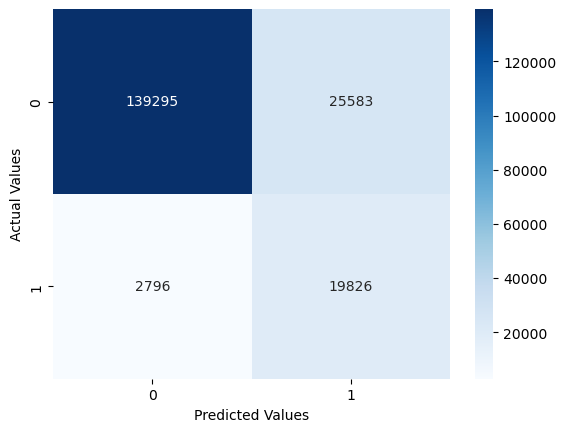

In [89]:
model_building(LogisticRegression)

Model Training Accuracy: 0.9999969674547241
Model Testing Accuracy: 0.8942933333333334

Confusion Matrix:
[[152353  12525]
 [  7295  15327]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94    164878
           1       0.55      0.68      0.61     22622

    accuracy                           0.89    187500
   macro avg       0.75      0.80      0.77    187500
weighted avg       0.91      0.89      0.90    187500



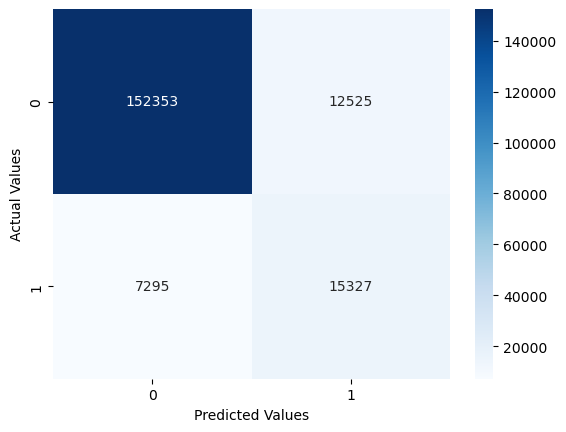

In [90]:
model_building(DecisionTreeClassifier)

Model Training Accuracy: 0.9999939349094482
Model Testing Accuracy: 0.9186346666666667

Confusion Matrix:
[[154929   9949]
 [  5307  17315]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    164878
           1       0.64      0.77      0.69     22622

    accuracy                           0.92    187500
   macro avg       0.80      0.85      0.82    187500
weighted avg       0.93      0.92      0.92    187500



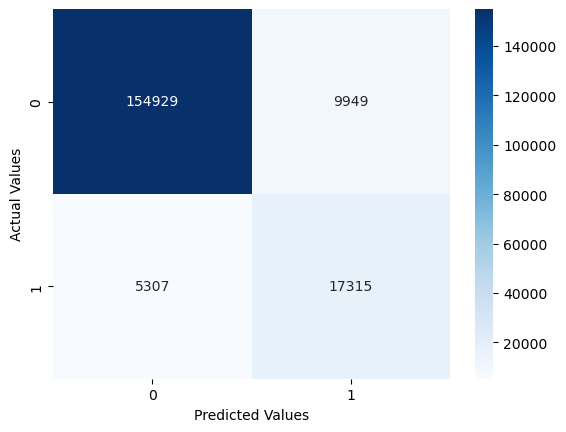

In [91]:
model_building(RandomForestClassifier)

Model Training Accuracy: 0.8882112834944625
Model Testing Accuracy: 0.856144

Confusion Matrix:
[[140969  23909]
 [  3064  19558]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    164878
           1       0.45      0.86      0.59     22622

    accuracy                           0.86    187500
   macro avg       0.71      0.86      0.75    187500
weighted avg       0.91      0.86      0.87    187500



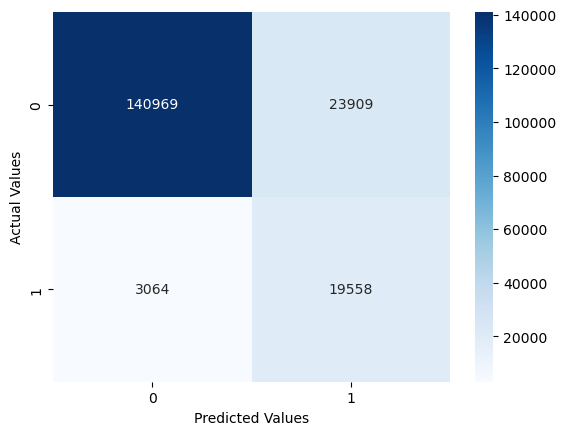

In [92]:
model_building(AdaBoostClassifier)

Model Training Accuracy: 0.9165716469146884
Model Testing Accuracy: 0.8833813333333334

Confusion Matrix:
[[145991  18887]
 [  2979  19643]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93    164878
           1       0.51      0.87      0.64     22622

    accuracy                           0.88    187500
   macro avg       0.74      0.88      0.79    187500
weighted avg       0.92      0.88      0.90    187500



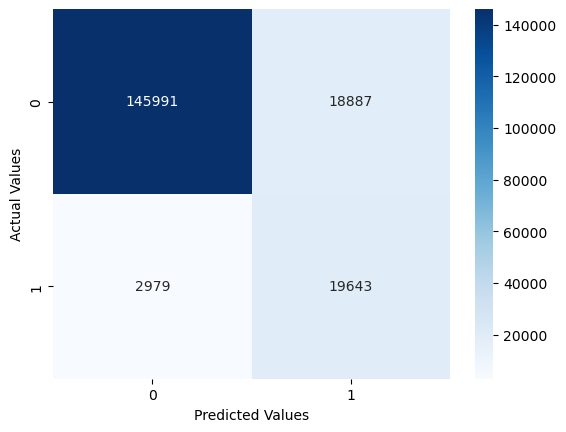

In [93]:
model_building(GradientBoostingClassifier)

Model Training Accuracy: 0.9512346502666618
Model Testing Accuracy: 0.920304

Confusion Matrix:
[[155168   9710]
 [  5233  17389]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    164878
           1       0.64      0.77      0.70     22622

    accuracy                           0.92    187500
   macro avg       0.80      0.85      0.83    187500
weighted avg       0.93      0.92      0.92    187500



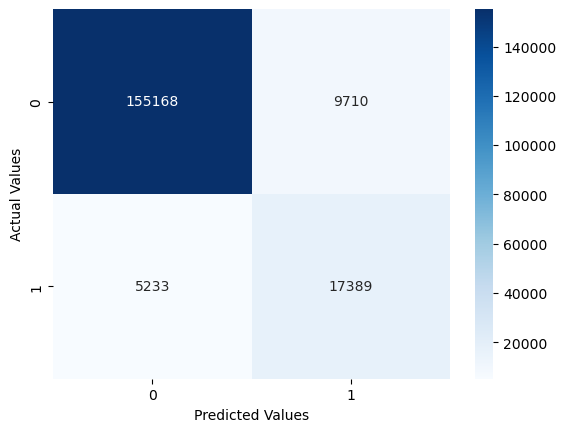

In [94]:
model_building(XGBClassifier)

## We Will Use either Random Forest Tree Classifier or XGBoostClassifier Model To Predict Our Target Variable

In [95]:
rf = RandomForestClassifier(random_state= 42)

kfold = KFold(n_splits= 5, shuffle= True, random_state= 42)

param_grid = {
    "max_depth": [None, 100, 300],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv= kfold, n_jobs= -1)
grid_search.fit(X_train_over, y_train_over)
best_params_rf = grid_search.best_params_
best_model_rf = grid_search.best_estimator_
print(best_params_rf)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


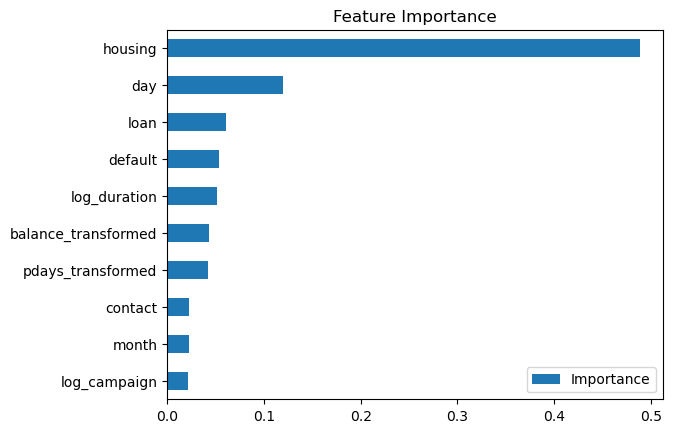

In [98]:
importances = best_model_rf.feature_importances_
indicies = np.argsort(importances)[-10:]

feature_names = binary_features + transformed_features +  list(preprocessor.named_transformers_['one hot encoder'].get_feature_names_out(cat_features_nominal)) + list(preprocessor.named_transformers_['ordinal encoder'].get_feature_names_out(cat_features_ordinal))

df = pd.DataFrame(importances[indicies], index=np.array(feature_names)[indicies], columns=["Importance"])
df.plot(kind="barh", title="Feature Importance")
plt.show();

In [102]:
X_train_imp = X_train_over[:, indicies]
X_test_imp = X_test[:, indicies]

best_model_rf.fit(X_train_imp, y_train_over)

y_pred_train = best_model_rf.predict(X_train_imp)
y_pred = best_model_rf.predict(X_test_imp)
print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")

Model Training Accuracy: 0.999979783031494
Model Testing Accuracy: 0.916384


In [103]:
best_model_rf.fit(X_train_over, y_train_over)
y_pred_train = best_model_rf.predict(X_train_over)
y_pred = best_model_rf.predict(X_test)
print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")

Model Training Accuracy: 0.9999939349094482
Model Testing Accuracy: 0.9186346666666667


In [110]:
xgb = XGBClassifier(random_state= 42, n_jobs= -1)

kfold = KFold(n_splits= 5, shuffle= True, random_state= 42)

param_grid = {
    "max_depth": [6, 10],
    "eta": [0.1, 0.3],
}

grid_search = GridSearchCV(xgb, param_grid, cv= kfold, n_jobs= -1)
grid_search.fit(X_train_over, y_train_over)
best_params_xgb = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_
print(best_params_xgb)

{'eta': 0.3, 'max_depth': 10}


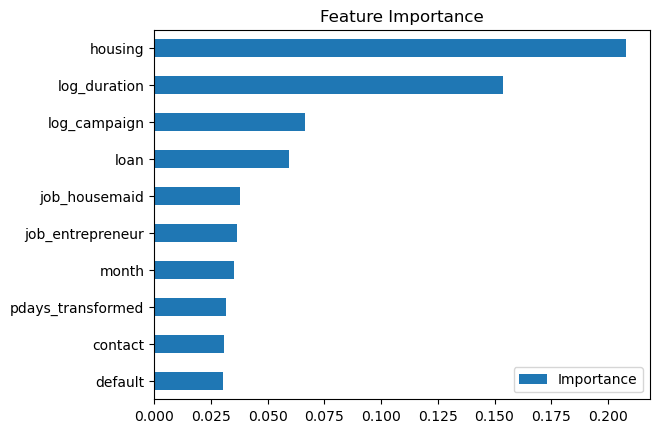

In [123]:
importances = best_model_xgb.feature_importances_
indicies = np.argsort(importances)[-10:]

feature_names = binary_features + transformed_features +  list(preprocessor.named_transformers_['one hot encoder'].get_feature_names_out(cat_features_nominal)) + list(preprocessor.named_transformers_['ordinal encoder'].get_feature_names_out(cat_features_ordinal))

df = pd.DataFrame(importances[indicies], index=np.array(feature_names)[indicies], columns=["Importance"])
df.plot(kind="barh", title="Feature Importance")
plt.show();

In [124]:
X_train_imp = X_train_over[:, indicies]
X_test_imp = X_test[:, indicies]

best_model_xgb.fit(X_train_imp, y_train_over)

y_pred_train = best_model_xgb.predict(X_train_imp)
y_pred = best_model_xgb.predict(X_test_imp)
print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")

Model Training Accuracy: 0.9521454246978575
Model Testing Accuracy: 0.9175466666666666


In [125]:
best_model_xgb.fit(X_train_over, y_train_over)
y_pred_train = best_model_xgb.predict(X_train_over)
y_pred = best_model_xgb.predict(X_test)
print(f"Model Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print(f"Model Testing Accuracy: {accuracy_score(y_test, y_pred)}")

Model Training Accuracy: 0.9671817950241998
Model Testing Accuracy: 0.9270133333333334


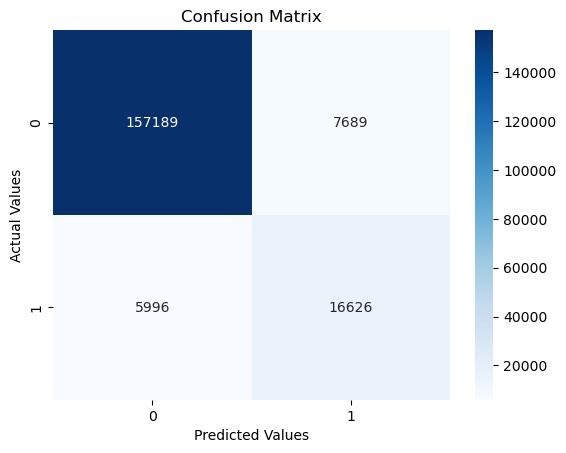

In [126]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap= "Blues", fmt= "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show();

In [127]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    164878
           1       0.68      0.73      0.71     22622

    accuracy                           0.93    187500
   macro avg       0.82      0.84      0.83    187500
weighted avg       0.93      0.93      0.93    187500



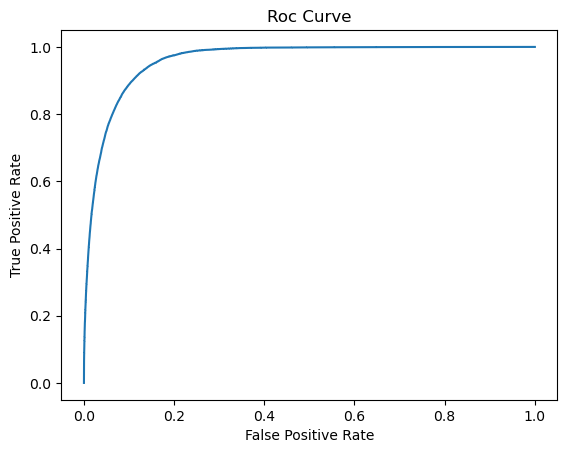

In [128]:
y_pred_proba = best_model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.show();

In [129]:
print(f"Roc Auc Score = {roc_auc_score(y_test, y_pred_proba)}")

Roc Auc Score = 0.9608267992032139


## We Will Use XGBClassifer and We Will Not Use Top 8 Features We Will Use All The Features

In [136]:
pipeline = Pipeline([
    ("Preprocessor", preprocessor),
    ("XGB", best_model_xgb)
])

pred = pipeline.predict(test)
pred_proba = pipeline.predict_proba(test)

In [137]:
with open(r"C:\Users\lenovo\Downloads\xgb_model.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [138]:
with open(r"C:\Users\lenovo\Downloads\xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [139]:
sample_submission.head()

,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5


In [140]:
sample_submission_final = pd.DataFrame({"id": sample_submission["id"], "y": loaded_model.predict_proba(test)[:, 1]})
sample_submission_final.head()

,id,y
0,750000,0.003517
1,750001,0.303505
2,750002,0.000106
3,750003,0.000137
4,750004,0.008367


In [141]:
sample_submission_final.to_csv("C:\\Users\\Lenovo\\Downloads\\sample_submission_final.csv", index= False)